In [29]:
from pathlib import Path
from Datagen import train_test
import numpy as np
# from Compile_the_data import train_test_for_pca
from Compile_the_data import dataset_for_classic
from Compile_the_data import train_test_for_pca_and_classic

from matplotlib import pyplot as plt
%matplotlib inline

#To do: Add clustarization to make prediction

In [2]:
from ensemble_model import ensemble_models

In [16]:
paths = [
    Path("img5_stripes/2/"),
    Path("img5_stripes/3/"),
       Path("img4_stripes/")
]

In [17]:
def condition(a):
    # based on dataset inspection plots
    return (0.120 > a) & (a > 0.105)

In [18]:
params_net = {"max_size": 1,
              "min_size": 1,
              "min_features" : 0.5,
              "max_features" : 1,
              "max_epoches" : 300,
              "min_epoches" : 250,
              "Batches" : [5, 3],
              "lr" : [1e-3]
}

params_classic = {"max_size": 1,
                  "min_size": 0.5,
                  "h" : [ 0.0001, 0.0002]
}

params_tree = {"max_size": 1,
               "min_size": 0.5,
               "min_features" : 0.5,
               "max_features" : 1,
               "lr" : [1.01], 
               "max_depth" : [80, 100], 
               "n_estimators" : [100, 150, 50]
}



In [19]:
start = 0.45
end = 0.65
n_classics= 10
n_neural= 15
n_forests= 10

In [20]:
BATCH=5
N_COMPONENTS = 50
train_test_sp = train_test_for_pca_and_classic(paths, N_COMPONENTS, filtered = condition) ## train_test(...) for average data
train_dataset, test_dataset = train_test_sp.get()

In [21]:
train_target_classic = [train_dataset.target for i in range(len(train_dataset.inten))]
test_target_classic = [test_dataset.target for i in range(len(test_dataset.inten))]

train_classic = [train_target_classic, train_dataset.inten]
test_classic = [test_target_classic, test_dataset.inten]

In [22]:
ensemble = ensemble_models(n_classics= n_classics, n_neural= n_neural, n_forests= n_forests, 
                           params_net = params_net, params_classic = params_classic, 
                           params_tree = params_tree, start = start, end = end)

In [23]:
ensemble.fit(train_classic, train_dataset)

Starting classical fitting

Finished classical fitting:
 It took 0'19

Starting machine learning

Starting train 0 model



/Users/maxim/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


---------------------------------------------

Finished train 1 model. It took 1:54'55

Starting train 1 model

---------------------------------------------

Finished train 2 model. It took 3:18'70

Starting train 2 model

---------------------------------------------

Finished train 3 model. It took 3:32'33

Starting train 3 model

---------------------------------------------

Finished train 4 model. It took 3:27'15

Starting train 4 model

---------------------------------------------

Finished train 5 model. It took 2:55'10

Starting train 5 model

---------------------------------------------

Finished train 6 model. It took 1:57'86

Starting train 6 model

---------------------------------------------

Finished train 7 model. It took 3:1'60

Starting train 7 model

---------------------------------------------

Finished train 8 model. It took 2:4'52

Starting train 8 model

---------------------------------------------

Finished train 9 model. It took 3:9'61

Starting train 9 mo

In [24]:
prediction, pred = ensemble.predict(test_classic[1], test_dataset)

/Users/maxim/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Text(0.5, 1.0, 'Ensemble: n_classics = 10, n_neural = 15, n_trees = 10')

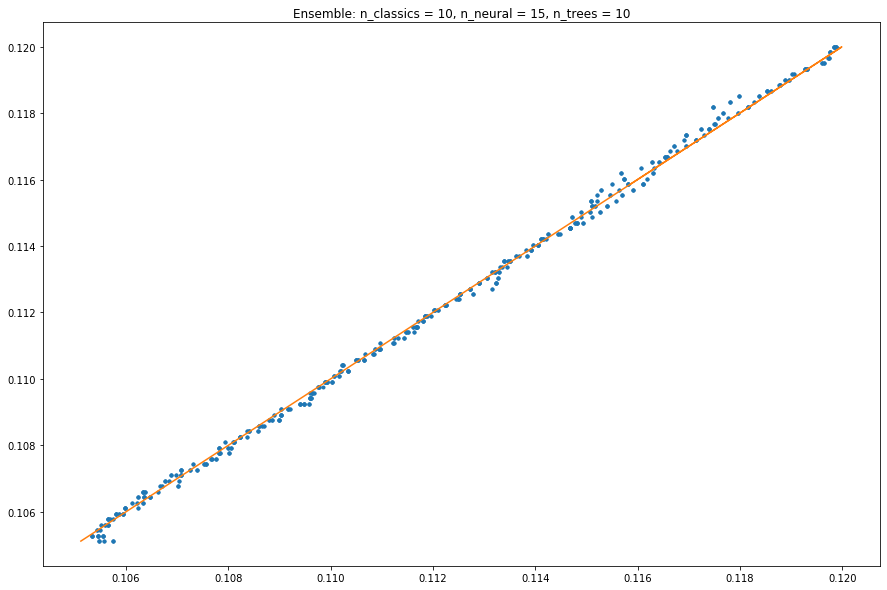

In [25]:
fig = plt.figure(figsize = (15, 10))
plt.plot(pred, test_dataset.target, '.')
plt.plot(test_dataset.target, test_dataset.target)
plt.title("Ensemble: n_classics = {}, n_neural = {}, n_trees = {}".format(n_classics, n_neural, n_forests))

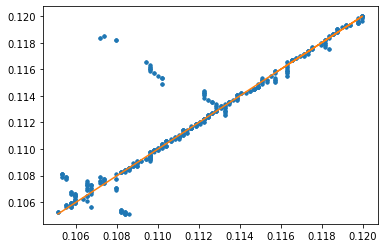

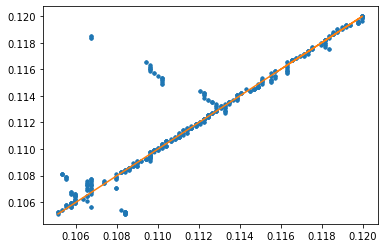

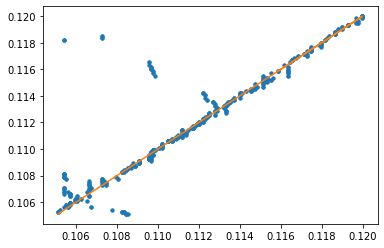

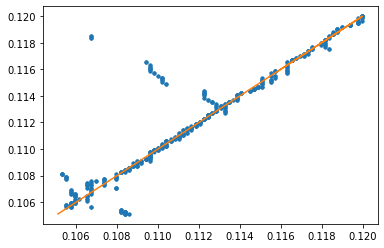

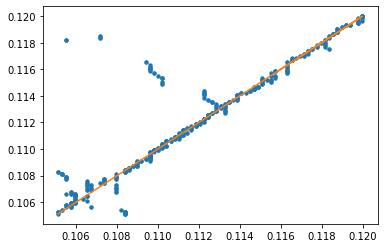

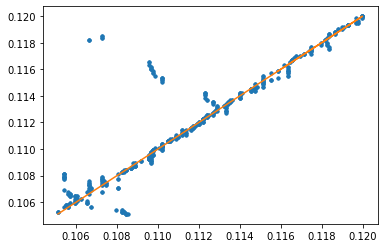

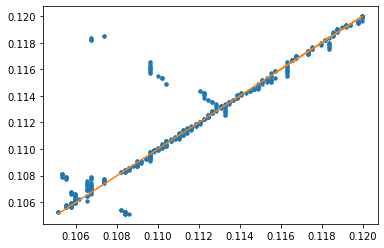

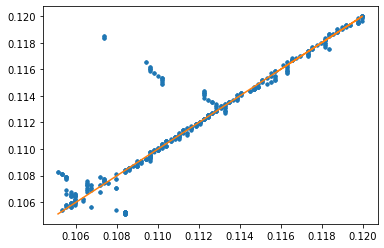

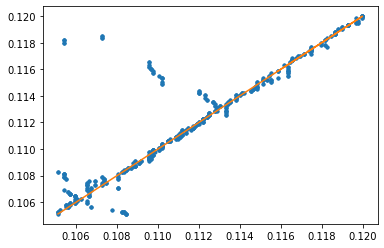

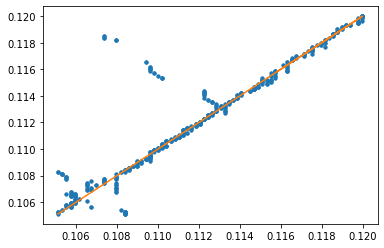

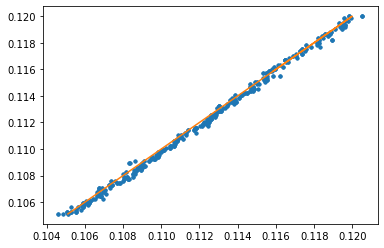

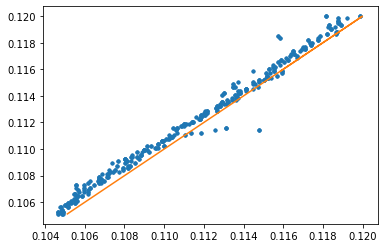

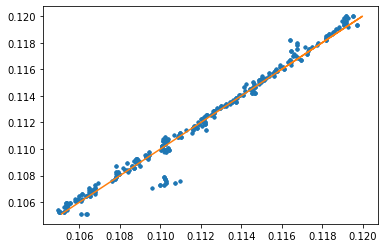

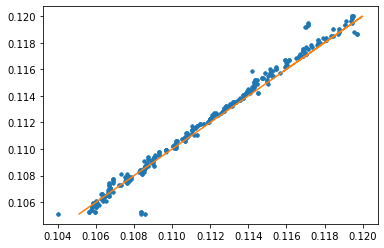

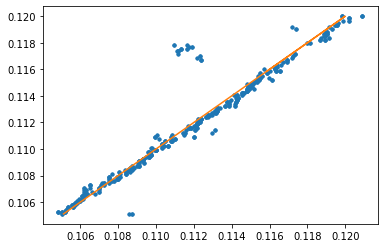

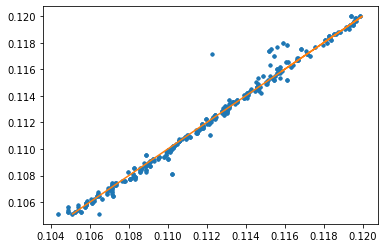

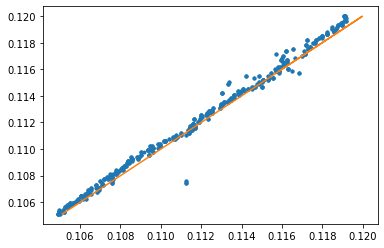

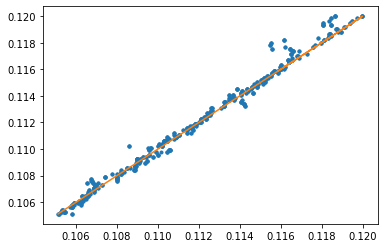

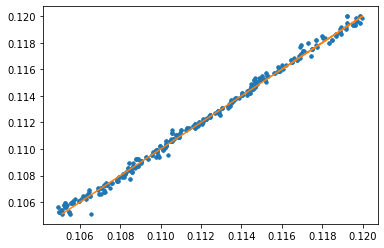

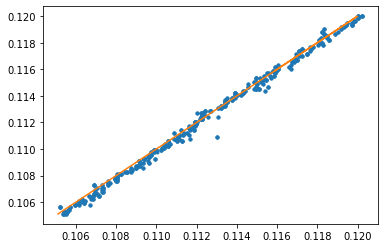

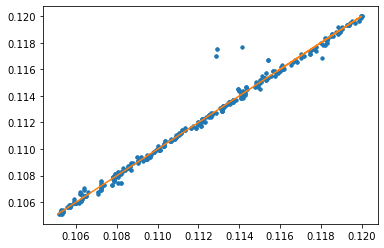

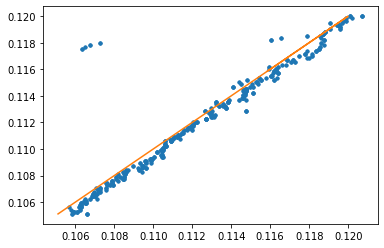

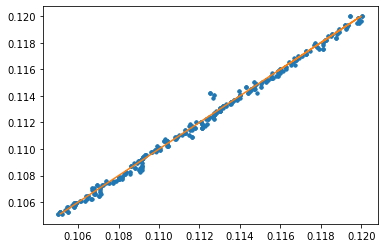

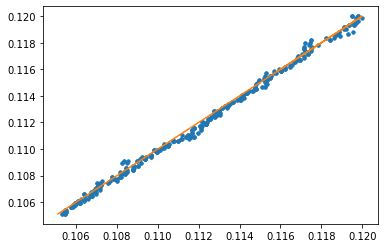

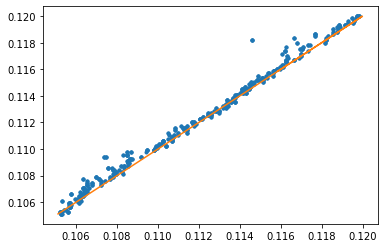

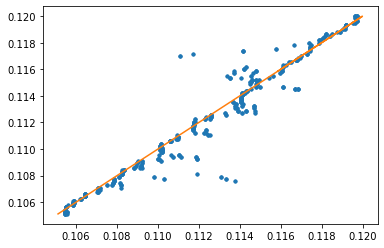

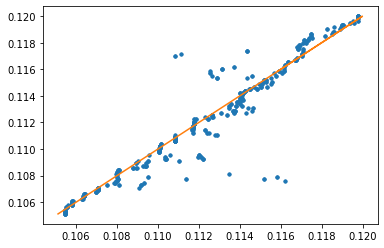

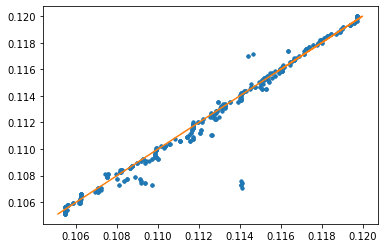

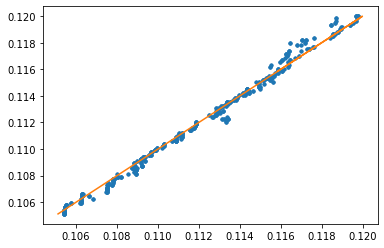

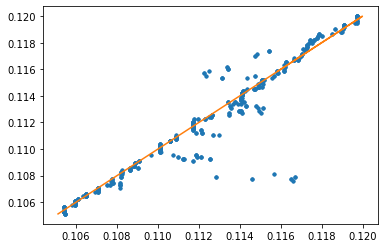

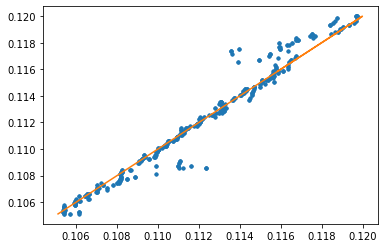

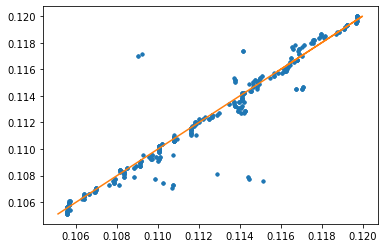

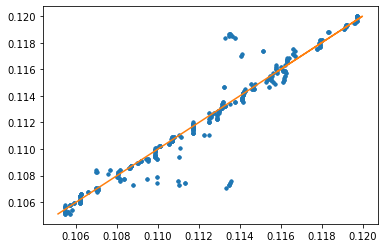

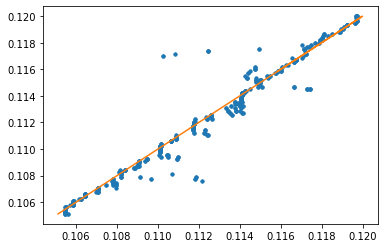

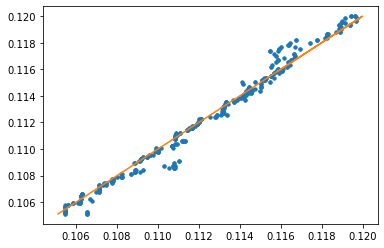

In [26]:
for i in range(len(prediction)):
    plt.plot(prediction[i], test_dataset.target, '.')
    plt.plot(test_dataset.target, test_dataset.target)
    plt.show()

In [27]:
import numpy as np

In [28]:
np.corrcoef(pred, test_dataset.target)

array([[1.        , 0.99929336],
       [0.99929336, 1.        ]])

# Record:
cor = 0.99929

# Examine PCA


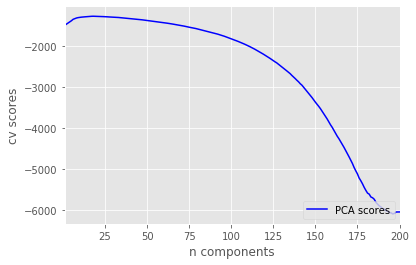

In [24]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score as cv_score
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
matplotlib.style.use('ggplot')
%matplotlib inline

def plot_scores(d_scores):
    n_components = np.arange(1,d_scores.size+1)
    plt.plot(n_components, d_scores, 'b', label='PCA scores')
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel('n components')
    plt.ylabel('cv scores')
    plt.legend(loc='lower right')
    plt.show()
    

        
data = train_dataset.images

D = len(data[0])

d_scores = []

for i in range(D):
    model = PCA(n_components=i+1)
    scores = cv_score(model, data, cv = 3)
    d_scores.append(scores.mean())
plot_scores(np.array(d_scores))

In [25]:
d_scores = np.array(d_scores)

In [26]:
np.where(d_scores == d_scores.max())

(array([17]),)

In [12]:
import time
start_time = time.time()

In [13]:
end_time = time.time()


In [14]:
def get_time(time):
    s = "'"+ str(int(time*100) % 100)
    s = str(int(time) % 60) + s
    time = int(time) // 60
    while time != 0:
        s = str(time % 60) + ":" + s
        time = time // 60
    return s

In [20]:
end_time = time.time()
get_time(end_time-start_time)

"3:41'72"

In [26]:
o = 0
print("Finished train {} model. It took ".format(o+1) + get_time(end_time-start_time) + "\n")

Finished train 1 model. It took 3:41'72

